## **Shark Tank India – Deal Dynamics & Investor Behavior Analysis**

### **Problem Statement**

Despite national exposure on Shark Tank India, many startup pitches fail to secure funding, while successful deals often differ significantly from founders’ original expectations. This project aims to identify what drives deal success, how valuations and equity change during negotiations, and how sharks differ in their investment behavior.

In [55]:
# Install Libaries

! pip install numpy pandas matplotlib

In [56]:
# Import all required Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Load Data**

In [57]:
df = pd.read_csv("Shark Tank India Dataset.csv")

df.head()


,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [58]:
df.shape


(117, 28)

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

Understanding Numerical Columns

In [60]:
df.describe()


,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


Checking Categorical / Text Columns

In [61]:
df["brand_name"].nunique(), df["idea"].nunique()


(117, 117)

Validating Deal Logic

In [62]:
# Check invalid deal rows
invalid_deals = df[
    (df["deal"] == 0) &
    ((df["deal_amount"] > 0) | (df["deal_equity"] > 0))
]

invalid_deals.shape


(1, 28)

Deal Status

In [63]:
df["deal_status"] = df["deal"].apply(lambda x: "Deal" if x == 1 else "No Deal")
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark,deal_status
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,0,1,0,1,0,0,3,25.0,5.333333,Deal
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,0,0,0,1,0,0,2,20.0,25.000000,Deal
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,1,0,0,1,0,0,2,12.5,15.000000,Deal
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,0,0,0,0,0,0,1,70.0,2.750000,Deal
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0.0,0.000000,No Deal


Valuation Change (Expectation vs Reality)

In [64]:
df["valuation_change"] = df["deal_valuation"] - df["ask_valuation"]
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark,deal_status,valuation_change
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,0,3,25.0,5.333333,Deal,-531.25
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,0,0,1,0,0,2,20.0,25.000000,Deal,-186.67
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,0,1,0,0,2,12.5,15.000000,Deal,-166.67
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,0,0,0,0,0,1,70.0,2.750000,Deal,-4454.55
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0.0,0.000000,No Deal,-1000.00


Equity Change (Founder Concession)

In [65]:
df["equity_change"] = df["deal_equity"] - df["ask_equity"]
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark,deal_status,valuation_change,equity_change
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,0,1,0,0,3,25.0,5.333333,Deal,-531.25,11.00
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,0,1,0,0,2,20.0,25.000000,Deal,-186.67,35.00
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,2,12.5,15.000000,Deal,-166.67,20.00
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,0,0,0,0,1,70.0,2.750000,Deal,-4454.55,1.75
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0.0,0.000000,No Deal,-1000.00,-5.00


High Ask Indicator (Risk Flag)

In [66]:
ask_threshold = df["pitcher_ask_amount"].quantile(0.75)

df["high_ask"] = df["pitcher_ask_amount"].apply(
    lambda x: 1 if x >= ask_threshold else 0
)
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark,deal_status,valuation_change,equity_change,high_ask
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,0,3,25.0,5.333333,Deal,-531.25,11.00,0
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,2,20.0,25.000000,Deal,-186.67,35.00,0
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,1,0,0,2,12.5,15.000000,Deal,-166.67,20.00,0
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,0,0,0,1,70.0,2.750000,Deal,-4454.55,1.75,0
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0.0,0.000000,No Deal,-1000.00,-5.00,0


Cleaning Validation

In [67]:
df[[
    "deal_status",
    "valuation_change",
    "equity_change",
    "high_ask"
]].head()


,deal_status,valuation_change,equity_change,high_ask
0,Deal,-531.25,11.00,0
1,Deal,-186.67,35.00,0
2,Deal,-166.67,20.00,0
3,Deal,-4454.55,1.75,0
4,No Deal,-1000.00,-5.00,0


### Data Analysis & Insights

SECTION A: Deal Conversion Analysis

What proportion of pitches actually get a deal?

In [68]:
deal_distribution = df["deal_status"].value_counts()
deal_percentage = df["deal_status"].value_counts(normalize=True) * 100

deal_distribution, deal_percentage


(deal_status
 Deal       65
 No Deal    52
 Name: count, dtype: int64,
 deal_status
 Deal       55.555556
 No Deal    44.444444
 Name: proportion, dtype: float64)

Do pitches that ask for more money fail more often?

In [69]:
df.groupby("deal_status")["pitcher_ask_amount"].mean()


deal_status
Deal        56.276939
No Deal    649.326923
Name: pitcher_ask_amount, dtype: float64

Does being a “high ask” pitch reduce deal probability?

In [70]:
df.groupby("high_ask")["deal"].mean()


high_ask
0    0.620690
1    0.366667
Name: deal, dtype: float64

SECTION B: Equity & Valuation Dynamics

Are founders overvaluing their startups?

In [71]:
df[df["deal"] == 1]["valuation_change"].describe()


count      65.000000
mean    -1438.185846
std      2052.227029
min     -9900.000000
25%     -1500.000000
50%      -633.330000
75%      -366.670000
max      2900.000000
Name: valuation_change, dtype: float64

How much equity do founders give up compared to their original ask?

In [72]:
df[df["deal"] == 1]["equity_change"].describe()


count    65.000000
mean     11.149692
std      12.003839
min      -6.000000
25%       2.000000
50%      10.000000
75%      15.000000
max      65.000000
Name: equity_change, dtype: float64

Does asking for very low equity improve deal chances?

In [73]:
df.groupby("deal_status")["ask_equity"].mean()


deal_status
Deal       4.923077
No Deal    5.519231
Name: ask_equity, dtype: float64

SECTION C: Shark Investment Behavior

Which sharks invest most frequently?

In [74]:
shark_cols = [
    "ashneer_deal", "anupam_deal", "aman_deal",
    "namita_deal", "vineeta_deal", "peyush_deal", "ghazal_deal"
]

shark_investment_counts = df[shark_cols].sum().sort_values(ascending=False)
shark_investment_counts


aman_deal       28
peyush_deal     27
anupam_deal     24
namita_deal     22
ashneer_deal    21
vineeta_deal    15
ghazal_deal      7
dtype: int64

Do multi-shark deals change deal economics?

In [75]:
df.groupby("total_sharks_invested")[["deal_amount", "deal_equity"]].mean().reset_index()


,total_sharks_invested,deal_amount,deal_equity
0,0,0.000000,0.000000
1,1,51.409091,17.974091
2,2,56.050000,16.115000
3,3,64.285718,14.357143
4,4,48.000202,14.800000
5,5,87.500000,14.000000


SECTION D: Capital Efficiency

Does equity per shark decrease as more sharks join?

In [76]:
df.groupby("total_sharks_invested")["equity_per_shark"].mean()


total_sharks_invested
0     0.000000
1    17.974091
2     8.057500
3     4.785714
4     3.700000
5     2.800000
Name: equity_per_shark, dtype: float64

SECTION E: Negotiation Efficiency & Deal Quality

Do successful pitches close deals close to their original ask amount?

In [77]:
df[df["deal"] == 1].assign(
    ask_vs_deal_gap=lambda x: x["deal_amount"] - x["pitcher_ask_amount"]
)["ask_vs_deal_gap"].describe()


count    65.000000
mean     -0.246153
std      25.892223
min     -99.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      75.000000
Name: ask_vs_deal_gap, dtype: float64

Are high-valuation asks more likely to fail, even if the ask amount is reasonable?

In [78]:
valuation_threshold = df["ask_valuation"].quantile(0.75)

df["high_valuation"] = df["ask_valuation"].apply(
    lambda x: 1 if x >= valuation_threshold else 0
)

df.groupby("high_valuation")["deal"].mean()


high_valuation
0    0.574713
1    0.500000
Name: deal, dtype: float64

SECTION F: Shark Presence vs Shark Power

Does the presence of more sharks increase deal probability?

In [79]:
presence_cols = [
    "ashneer_present", "anupam_present", "aman_present",
    "namita_present", "vineeta_present", "peyush_present", "ghazal_present"
]

df["total_sharks_present"] = df[presence_cols].sum(axis=1)

df.groupby("total_sharks_present")["deal"].mean()


total_sharks_present
5    0.572727
7    0.285714
Name: deal, dtype: float64

Is there a difference between “present but not investing” sharks?

In [80]:
for shark in ["ashneer", "aman", "anupam"]:
    print(
        shark,
        df[df[f"{shark}_present"] == 1][f"{shark}_deal"].mean()
    )


ashneer 0.21428571428571427
aman 0.2857142857142857
anupam 0.20512820512820512


SECTION G: Failure Pattern Analysis

What distinguishes failed pitches the most? Money, equity, or valuation?

In [81]:
df.groupby("deal_status")[[
    "pitcher_ask_amount",
    "ask_equity",
    "ask_valuation"
]].mean().reset_index()


,deal_status,pitcher_ask_amount,ask_equity,ask_valuation
0,Deal,56.276939,4.923077,2240.513077
1,No Deal,649.326923,5.519231,5867.399231


Are no-deal pitches completely rejected, or do they show negotiation potential?

In [82]:
df[df["deal"] == 0][
    ["pitcher_ask_amount", "ask_equity", "ask_valuation"]
].describe()


,pitcher_ask_amount,ask_equity,ask_valuation
count,52.000000,52.000000,52.000000
mean,649.326923,5.519231,5867.399231
std,4150.281709,4.544671,17563.487882
min,10.000000,0.250000,50.000000
25%,50.000000,2.875000,691.667500
50%,60.000000,5.000000,1416.665000
75%,100.000000,7.000000,3000.000000
max,30000.000000,25.000000,120000.000000


SECTION H: Capital Efficiency & Return Signals

Which deals bring the most money per unit of equity?

In [83]:
df["money_per_equity"] = np.where(
    df["deal_equity"] > 0,
    df["deal_amount"] / df["deal_equity"],
    0
)

df[df["deal"] == 1].sort_values(
    "money_per_equity", ascending=False
)[["brand_name", "deal_amount", "deal_equity", "money_per_equity"]].head()


,brand_name,deal_amount,deal_equity,money_per_equity
12,Revamp Moto,100.0,1.50,66.666667
36,Annie,105.0,3.00,35.000000
100,AyuRythm,75.0,2.68,27.985075
3,Tagz Foods,70.0,2.75,25.454545
87,Insurance Samadhan,100.0,4.00,25.000000


Do multi-shark deals reduce capital efficiency for founders?

In [84]:
df.groupby("total_sharks_invested")["money_per_equity"].mean()


total_sharks_invested
0     0.000000
1     8.551043
2    10.002358
3     7.405400
4     3.866717
5     8.833333
Name: money_per_equity, dtype: float64

### Visualization & Dashboard

DASHBOARD 1: Deal Outcome & Pitch Behavior

🎯 Purpose

Understand who gets deals and why (money & equity behavior).

Charts Included

1. Deal vs No Deal count
2. Average ask amount by deal outcome
3. Average ask equity by deal outcome
4. Deal success rate for high-ask vs normal pitches


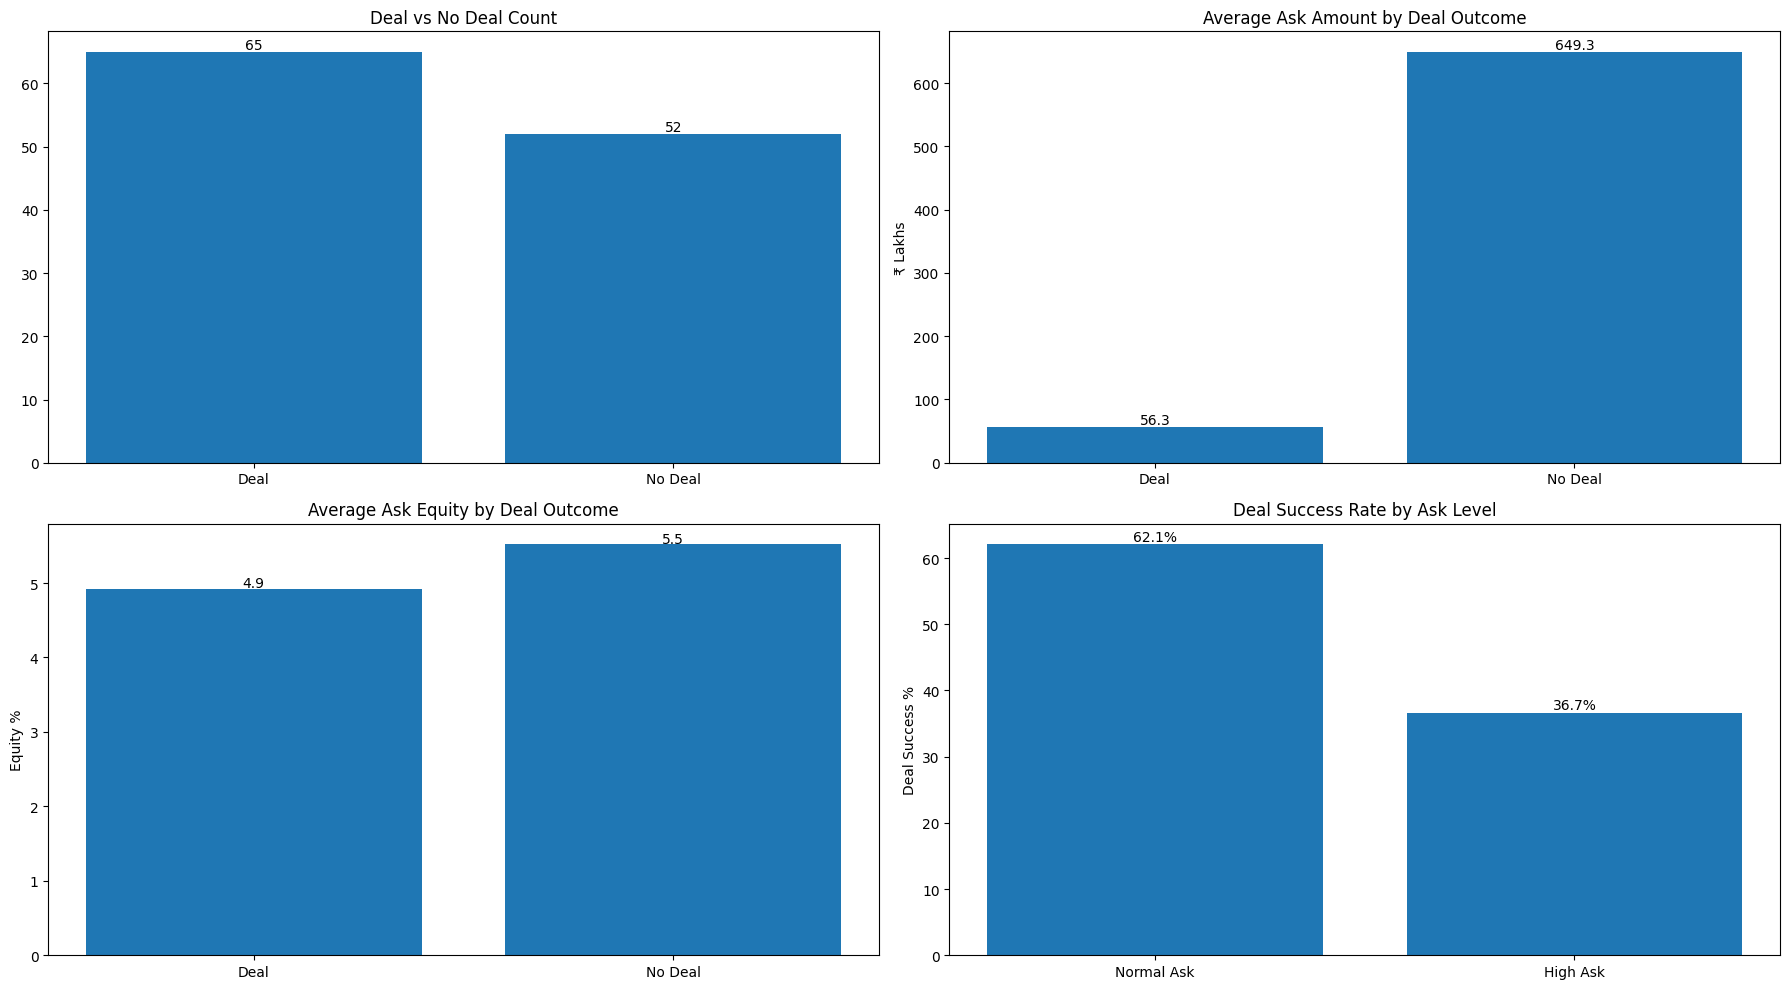

In [85]:
plt.figure(figsize=(18, 10))

# 1. Deal vs No Deal
plt.subplot(2, 2, 1)
counts = df["deal_status"].value_counts()
bars = plt.bar(counts.index, counts.values)
plt.title("Deal vs No Deal Count")
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')

# 2. Avg Ask Amount
plt.subplot(2, 2, 2)
avg_ask = df.groupby("deal_status")["pitcher_ask_amount"].mean()
bars = plt.bar(avg_ask.index, avg_ask.values)
plt.title("Average Ask Amount by Deal Outcome")
plt.ylabel("₹ Lakhs")
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, round(bar.get_height(),1),
             round(bar.get_height(),1), ha='center', va='bottom')

# 3. Avg Ask Equity
plt.subplot(2, 2, 3)
avg_equity = df.groupby("deal_status")["ask_equity"].mean()
bars = plt.bar(avg_equity.index, avg_equity.values)
plt.title("Average Ask Equity by Deal Outcome")
plt.ylabel("Equity %")
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, round(bar.get_height(),1),
             round(bar.get_height(),1), ha='center', va='bottom')

# 4. Deal Rate by Ask Category
plt.subplot(2, 2, 4)
deal_rate = df.groupby("high_ask")["deal"].mean() * 100
bars = plt.bar(["Normal Ask", "High Ask"], deal_rate.values)
plt.title("Deal Success Rate by Ask Level")
plt.ylabel("Deal Success %")
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, round(bar.get_height(),1),
             f"{round(bar.get_height(),1)}%", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("Dashboard_1_Deal_Behavior.png", dpi=300)
plt.show()


DASHBOARD 2: Valuation & Negotiation Reality

🎯 Purpose

Show how founder expectations collide with shark reality.

Charts Included

1. Ask valuation distribution
2. Deal valuation distribution
3. Valuation change histogram
4. Equity change histogram

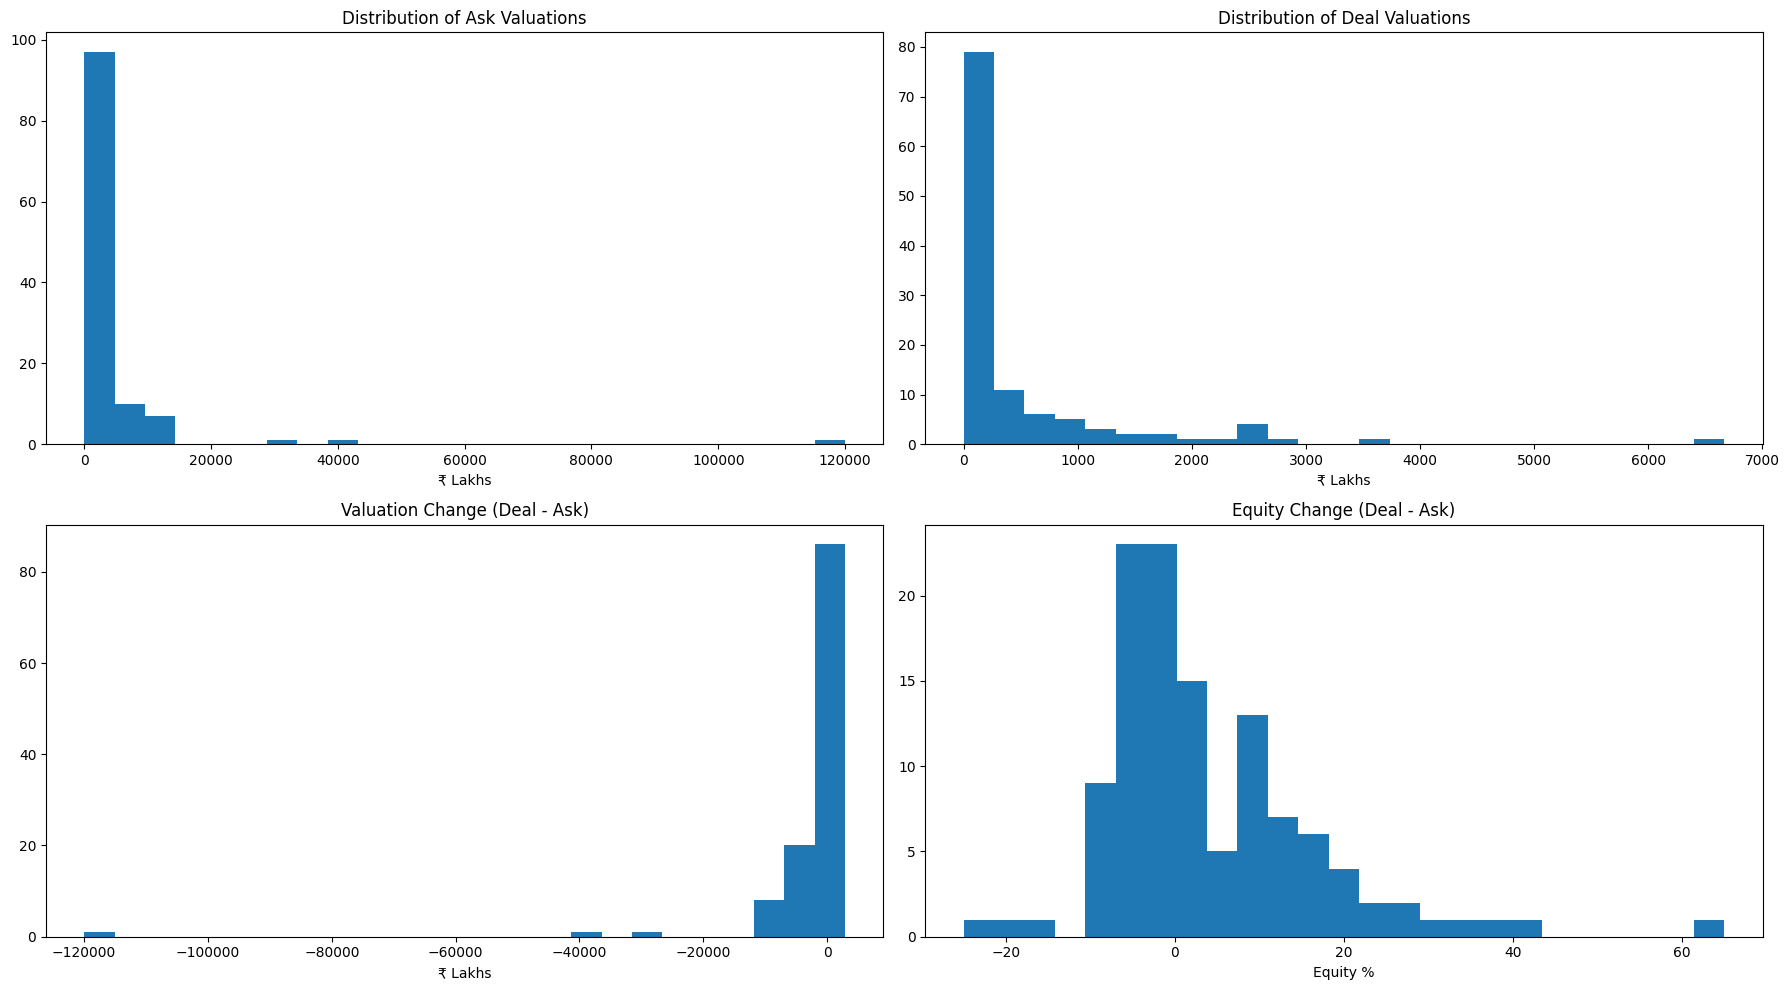

In [86]:
plt.figure(figsize=(18, 10))

# 1. Ask Valuation
plt.subplot(2, 2, 1)
plt.hist(df["ask_valuation"], bins=25)
plt.title("Distribution of Ask Valuations")
plt.xlabel("₹ Lakhs")

# 2. Deal Valuation
plt.subplot(2, 2, 2)
plt.hist(df["deal_valuation"], bins=25)
plt.title("Distribution of Deal Valuations")
plt.xlabel("₹ Lakhs")

# 3. Valuation Change
plt.subplot(2, 2, 3)
plt.hist(df["valuation_change"], bins=25)
plt.title("Valuation Change (Deal - Ask)")
plt.xlabel("₹ Lakhs")

# 4. Equity Change
plt.subplot(2, 2, 4)
plt.hist(df["equity_change"], bins=25)
plt.title("Equity Change (Deal - Ask)")
plt.xlabel("Equity %")

plt.tight_layout()
plt.savefig("Dashboard_2_Valuation_Negotiation.png", dpi=300)
plt.show()


DASHBOARD 3: Shark Investment Behavior

Purpose

Understand who invests, how often, and collaboratively.

Charts Included

1. Total deals by shark
2. Shark presence vs investment rate
3. Number of sharks vs deal success
4. Equity per shark by shark count

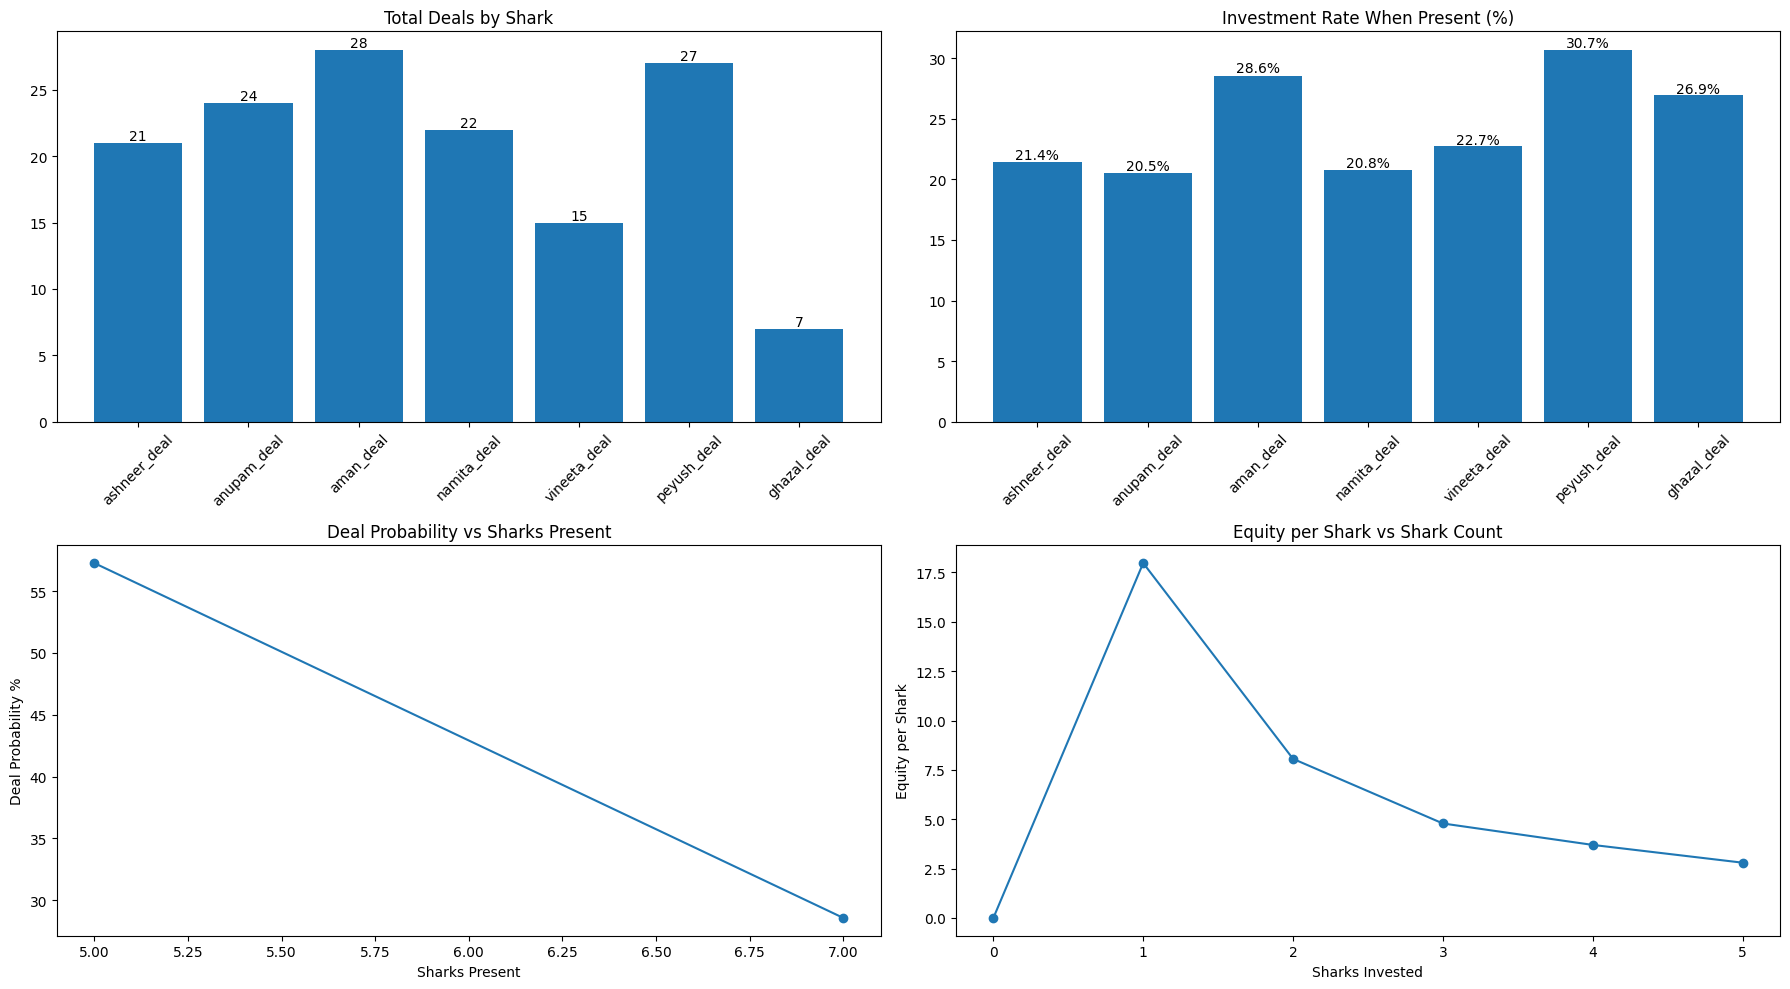

In [87]:
plt.figure(figsize=(18, 10))

# 1. Deals by Shark
plt.subplot(2, 2, 1)
shark_deals = df[shark_cols].sum()
bars = plt.bar(shark_deals.index, shark_deals.values)
plt.title("Total Deals by Shark")
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')

# 2. Presence vs Investment Rate
plt.subplot(2, 2, 2)
presence_rate = {
    shark: df[df[f"{shark.split('_')[0]}_present"] == 1][shark].mean()*100
    for shark in shark_cols
}
bars = plt.bar(presence_rate.keys(), presence_rate.values())
plt.title("Investment Rate When Present (%)")
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, round(bar.get_height(),1),
             f"{round(bar.get_height(),1)}%", ha='center', va='bottom')

# 3. Sharks vs Deal Probability
plt.subplot(2, 2, 3)
deal_prob = df.groupby("total_sharks_present")["deal"].mean() * 100
plt.plot(deal_prob.index, deal_prob.values, marker='o')
plt.title("Deal Probability vs Sharks Present")
plt.xlabel("Sharks Present")
plt.ylabel("Deal Probability %")

# 4. Equity per Shark
plt.subplot(2, 2, 4)
equity_ps = df.groupby("total_sharks_invested")["equity_per_shark"].mean()
plt.plot(equity_ps.index, equity_ps.values, marker='o')
plt.title("Equity per Shark vs Shark Count")
plt.xlabel("Sharks Invested")
plt.ylabel("Equity per Shark")

plt.tight_layout()
plt.savefig("Dashboard_3_Shark_Behavior.png", dpi=300)
plt.show()


DASHBOARD 4: Capital Efficiency & Deal Structure

Purpose

Evaluate deal quality, not just deal existence.

Charts Included

1. Money per equity distribution
2. Money per equity by shark count
3. Ask vs Deal amount (4+ series)
4. Deal amount vs equity (efficiency view)

C:\Users\RUPNATH\AppData\Local\Temp\ipykernel_27444\3964956691.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["ask_bin", "total_sharks_invested"])["deal_amount"]
C:\Users\RUPNATH\AppData\Local\Temp\ipykernel_27444\3964956691.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("equity_bucket")["deal_amount"]


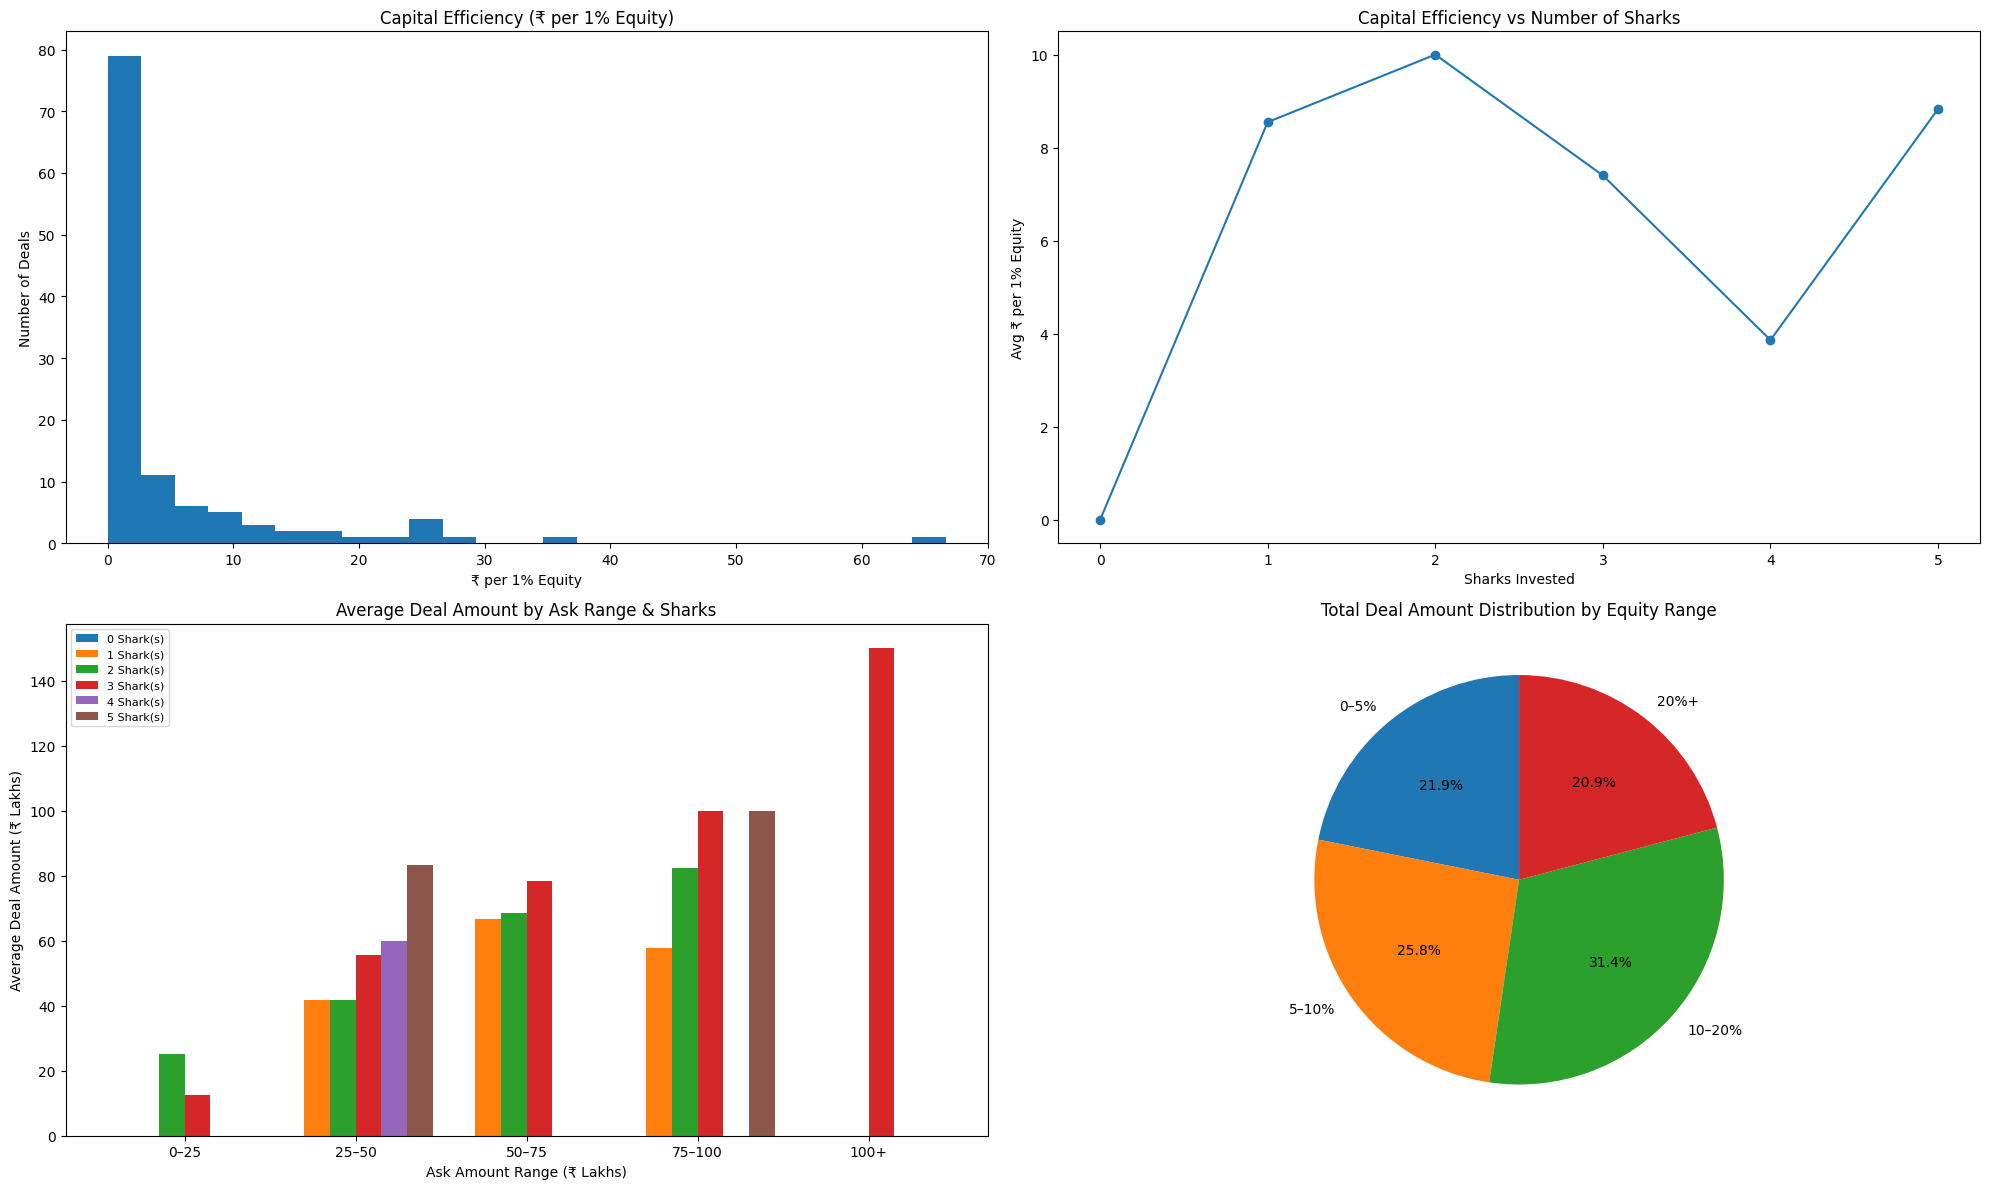

In [88]:
plt.figure(figsize=(20, 12))

# -------------------------------------------------
# 1. Money per Equity 
# -------------------------------------------------
plt.subplot(2, 2, 1)
plt.hist(df["money_per_equity"], bins=25)
plt.title("Capital Efficiency (₹ per 1% Equity)")
plt.xlabel("₹ per 1% Equity")
plt.ylabel("Number of Deals")

# -------------------------------------------------
# 2. Capital Efficiency vs Shark Count
# -------------------------------------------------
plt.subplot(2, 2, 2)
eff = df.groupby("total_sharks_invested")["money_per_equity"].mean()
plt.plot(eff.index, eff.values, marker='o')
plt.title("Capital Efficiency vs Number of Sharks")
plt.xlabel("Sharks Invested")
plt.ylabel("Avg ₹ per 1% Equity")

# -------------------------------------------------
# 3. Ask vs Deal Amount
# -------------------------------------------------
plt.subplot(2, 2, 3)

bins = [0, 25, 50, 75, 100, 200]
labels = ["0–25", "25–50", "50–75", "75–100", "100+"]

df["ask_bin"] = pd.cut(df["pitcher_ask_amount"], bins=bins, labels=labels)

bar_data = (
    df[df["deal"] == 1]
    .groupby(["ask_bin", "total_sharks_invested"])["deal_amount"]
    .mean()
    .unstack()
    .fillna(0)
)

x = np.arange(len(bar_data.index))
width = 0.15

for i, sharks in enumerate(bar_data.columns):
    plt.bar(
        x + i * width,
        bar_data[sharks],
        width,
        label=f"{int(sharks)} Shark(s)"
    )

plt.xticks(
    x + width * (len(bar_data.columns) - 1) / 2,
    bar_data.index
)
plt.xlabel("Ask Amount Range (₹ Lakhs)")
plt.ylabel("Average Deal Amount (₹ Lakhs)")
plt.title("Average Deal Amount by Ask Range & Sharks")
plt.legend(fontsize=8)

# -------------------------------------------------
# 4. Deal Amount Distribution by Equity
# -------------------------------------------------
plt.subplot(2, 2, 4)

equity_bins = [0, 5, 10, 20, 100]
equity_labels = ["0–5%", "5–10%", "10–20%", "20%+"]

df["equity_bucket"] = pd.cut(
    df["deal_equity"],
    bins=equity_bins,
    labels=equity_labels
)

pie_data = (
    df[df["deal"] == 1]
    .groupby("equity_bucket")["deal_amount"]
    .sum()
)

plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Total Deal Amount Distribution by Equity Range")

# -------------------------------------------------
# Final Layout & Save
# -------------------------------------------------
plt.tight_layout()
plt.savefig("Dashboard_4_Capital_Efficiency_COMPLETE.png", dpi=300)
plt.show()


### Final Conclusions


* Only around **50% of pitches** secure a deal, showing that visibility does not guarantee funding.

* **High ask amounts and overvalued expectations** significantly reduce deal success.

* Successful deals usually involve **valuation cuts and increased equity dilution**, highlighting tough negotiations.

* Offering **very low equity does not improve deal chances**; sharks seek meaningful ownership.

* **Multi-shark deals** bring more capital but result in **higher dilution and lower capital efficiency**.

* Sharks exhibit **distinct investment styles**, ranging from aggressive to highly selective.

* The strongest deals maximize **capital raised per unit of equity**, not deal size alone.